# Guacamole Index

## Requirements

### Libraries

In [561]:
import sys
import os
import pandas as pd
import numpy as np
import time
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta


# For creating cool charts :)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib import image
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates

# We load pre-defined functions, fonts and stylesheet.
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import *

path = [x for x in sys.path if "utils" in x][0]

# Optional for TUKAN's mplstylesheet
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

### Custom functions

In [562]:
# Filter dataframe by date range or for two specific dates
def date_selection(data_frame,first_date,last_date,inbewtween):
    if inbewtween==True:
        data_frame = data_frame[(data_frame["date"] >= first_date) & (data_frame["date"] <= last_date)].reset_index(drop = True)
    else:
        data_frame = data_frame[(data_frame["date"] == first_date) | (data_frame["date"] == last_date)].reset_index(drop = True)
    return(data_frame)


## Data

### Guacamole Data

#### Payload

In [563]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "product"
    ],
    "categories": {
        "product": [
            "02b414002b0923d",
            "b146318fe51b95c",
            "64967d83ac5aa6d",
            "83b09ec629dc758",
            "e4f91a6cd3bb389",
            "91f000d00e522da",
            "0e92d6a5900b8f1"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_inpc_product_biweekly", #mex_inegi_inpc_product_monthly
            "variables": [
                "c572db59b8cd109"
            ]
        },
    ],
    "from": "1999-01-01"
}

guac = get_tukan_api_request(payload)
guac_data = guac["data"]
guac_data

Success getting the data


,date,product__ref,product,c572db59b8cd109
0,1999-01-01,02b414002b0923d,Aguacates,18.701610
1,1999-01-01,0e92d6a5900b8f1,Concentrados de pollo y sal,33.074411
2,1999-01-01,64967d83ac5aa6d,Jitomates,78.576624
3,1999-01-01,83b09ec629dc758,Cebollas,60.123922
4,1999-01-01,91f000d00e522da,Limones,34.725954
...,...,...,...,...
3873,2022-01-15,64967d83ac5aa6d,Jitomates,110.131000
3874,2022-01-15,83b09ec629dc758,Cebollas,202.306000
3875,2022-01-15,91f000d00e522da,Limones,406.326000
3876,2022-01-15,b146318fe51b95c,Tortillas de maíz,128.260000


#### Guacamole Index

In [564]:
weights = pd.DataFrame(data={'product__ref': ['02b414002b0923d','83b09ec629dc758','e4f91a6cd3bb389','64967d83ac5aa6d','91f000d00e522da','0e92d6a5900b8f1','b146318fe51b95c'], 'weight': [.425,.125,.0125,.1875,.0875,.00625,.15625]})
guac_index_data = pd.merge(guac_data,weights, on='product__ref')

#Index
guac_index = pd.DataFrame(guac_index_data.groupby(guac_index_data.date).apply(lambda x: np.average(x.c572db59b8cd109, weights=x.weight)))
guac_index.reset_index(inplace=True)
guac_index.rename(columns={0:'guacamole_index'},inplace=True)

#Yearly var
guac_index['guac_yoy'] = guac_index['guacamole_index'].shift(24)
guac_index['guac_yoy'] = (guac_index['guacamole_index']/guac_index['guac_yoy'])-1

guac_index

,date,guacamole_index,guac_yoy
0,1999-01-01,37.988966,NaN
1,1999-01-15,38.876947,NaN
2,1999-02-01,38.001455,NaN
3,1999-02-15,36.427476,NaN
4,1999-03-01,34.830555,NaN
...,...,...,...
549,2021-11-15,147.545988,0.311751
550,2021-12-01,145.373656,0.394675
551,2021-12-15,147.418956,0.461070
552,2022-01-01,154.030544,0.532261


#### Lemonless Guacamole  Index

In [565]:
weights_lemonless = pd.DataFrame(data={'product__ref': ['02b414002b0923d','83b09ec629dc758','e4f91a6cd3bb389','64967d83ac5aa6d','91f000d00e522da','0e92d6a5900b8f1','b146318fe51b95c'], 'weight': [.4658,.1370,.0137,.2055,0,.0068,.1712]})
guac_lemonless_index_data = pd.merge(guac_data,weights_lemonless, on='product__ref')

# Index
guac_lemonless_index = pd.DataFrame(guac_lemonless_index_data.groupby(guac_lemonless_index_data.date).apply(lambda x: np.average(x.c572db59b8cd109, weights=x.weight)))
guac_lemonless_index.reset_index(inplace=True)
guac_lemonless_index.rename(columns={0:'guacamole_lemonless_index'},inplace=True)

#Yearly var
guac_lemonless_index['lemonless_yoy'] = guac_lemonless_index['guacamole_lemonless_index'].shift(24)
guac_lemonless_index['lemonless_yoy'] = (guac_lemonless_index['guacamole_lemonless_index']/guac_lemonless_index['lemonless_yoy'])-1

guac_lemonless_index

,date,guacamole_lemonless_index,lemonless_yoy
0,1999-01-01,38.302746,NaN
1,1999-01-15,38.096006,NaN
2,1999-02-01,35.864063,NaN
3,1999-02-15,33.515152,NaN
4,1999-03-01,32.086846,NaN
...,...,...,...
549,2021-11-15,146.485001,0.320610
550,2021-12-01,140.987141,0.371870
551,2021-12-15,136.406850,0.375590
552,2022-01-01,134.386743,0.373542


#### Guacamole Indexes

In [566]:
guacamole_indexes = pd.merge(guac_index, guac_lemonless_index)
guacamole_indexes

,date,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,1999-01-01,37.988966,NaN,38.302746,NaN
1,1999-01-15,38.876947,NaN,38.096006,NaN
2,1999-02-01,38.001455,NaN,35.864063,NaN
3,1999-02-15,36.427476,NaN,33.515152,NaN
4,1999-03-01,34.830555,NaN,32.086846,NaN
...,...,...,...,...,...
549,2021-11-15,147.545988,0.311751,146.485001,0.320610
550,2021-12-01,145.373656,0.394675,140.987141,0.371870
551,2021-12-15,147.418956,0.461070,136.406850,0.375590
552,2022-01-01,154.030544,0.532261,134.386743,0.373542


### CPI Data

#### Payload

In [567]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "product"
    ],
    "categories": {
        "product": [
            "193b800af2978be"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_inpc_product_biweekly",
            "variables": [
                "c572db59b8cd109"
            ]
        }
    ],
    "from": "1999-01-10"
}

cpi = get_tukan_api_request(payload)
cpi_data = cpi["data"]
cpi_data.drop(columns=['product__ref','product'],inplace=True)
cpi_data.rename(columns={'c572db59b8cd109':'cpi'},inplace=True)
cpi_data

Success getting the data


,date,cpi
0,1999-01-01,40.294042
1,1999-01-15,40.645518
2,1999-02-01,40.927675
3,1999-02-15,41.099610
4,1999-03-01,41.295943
...,...,...
549,2021-11-15,117.184000
550,2021-12-01,117.301000
551,2021-12-15,117.314000
552,2022-01-01,117.770000


## Plots

### Final data

In [568]:
final_data = pd.merge(cpi_data, guacamole_indexes)
final_data = date_selection(final_data,'2000-01-01','2022-01-15',inbewtween=True)
final_data

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,2000-01-01,44.809270,34.481462,-0.092330,29.664835,-0.225517
1,2000-01-15,45.052246,32.737729,-0.157914,28.008979,-0.264779
2,2000-02-01,45.272547,31.650707,-0.167119,26.991978,-0.247381
3,2000-02-15,45.386070,31.020865,-0.148421,26.424939,-0.211552
4,2000-03-01,45.530449,29.997859,-0.138749,26.188723,-0.183817
...,...,...,...,...,...,...
525,2021-11-15,117.184000,147.545988,0.311751,146.485001,0.320610
526,2021-12-01,117.301000,145.373656,0.394675,140.987141,0.371870
527,2021-12-15,117.314000,147.418956,0.461070,136.406850,0.375590
528,2022-01-01,117.770000,154.030544,0.532261,134.386743,0.373542


In [569]:
final_data[final_data['date']=='2018-07-01']

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
444,2018-07-01,99.818949,96.927707,-0.184658,96.850606,-0.202749


In [570]:
# Avocado data
avocado_data = guac_data[guac_data['product__ref']=='02b414002b0923d']
avocado_data = date_selection(avocado_data,'2000-01-01','2022-01-15',inbewtween=True)

# Lemon data
lemon_data = guac_data[guac_data['product__ref']=='91f000d00e522da']
lemon_data = date_selection(lemon_data,'2000-01-01','2022-01-15',inbewtween=True)

### Guacamole Index

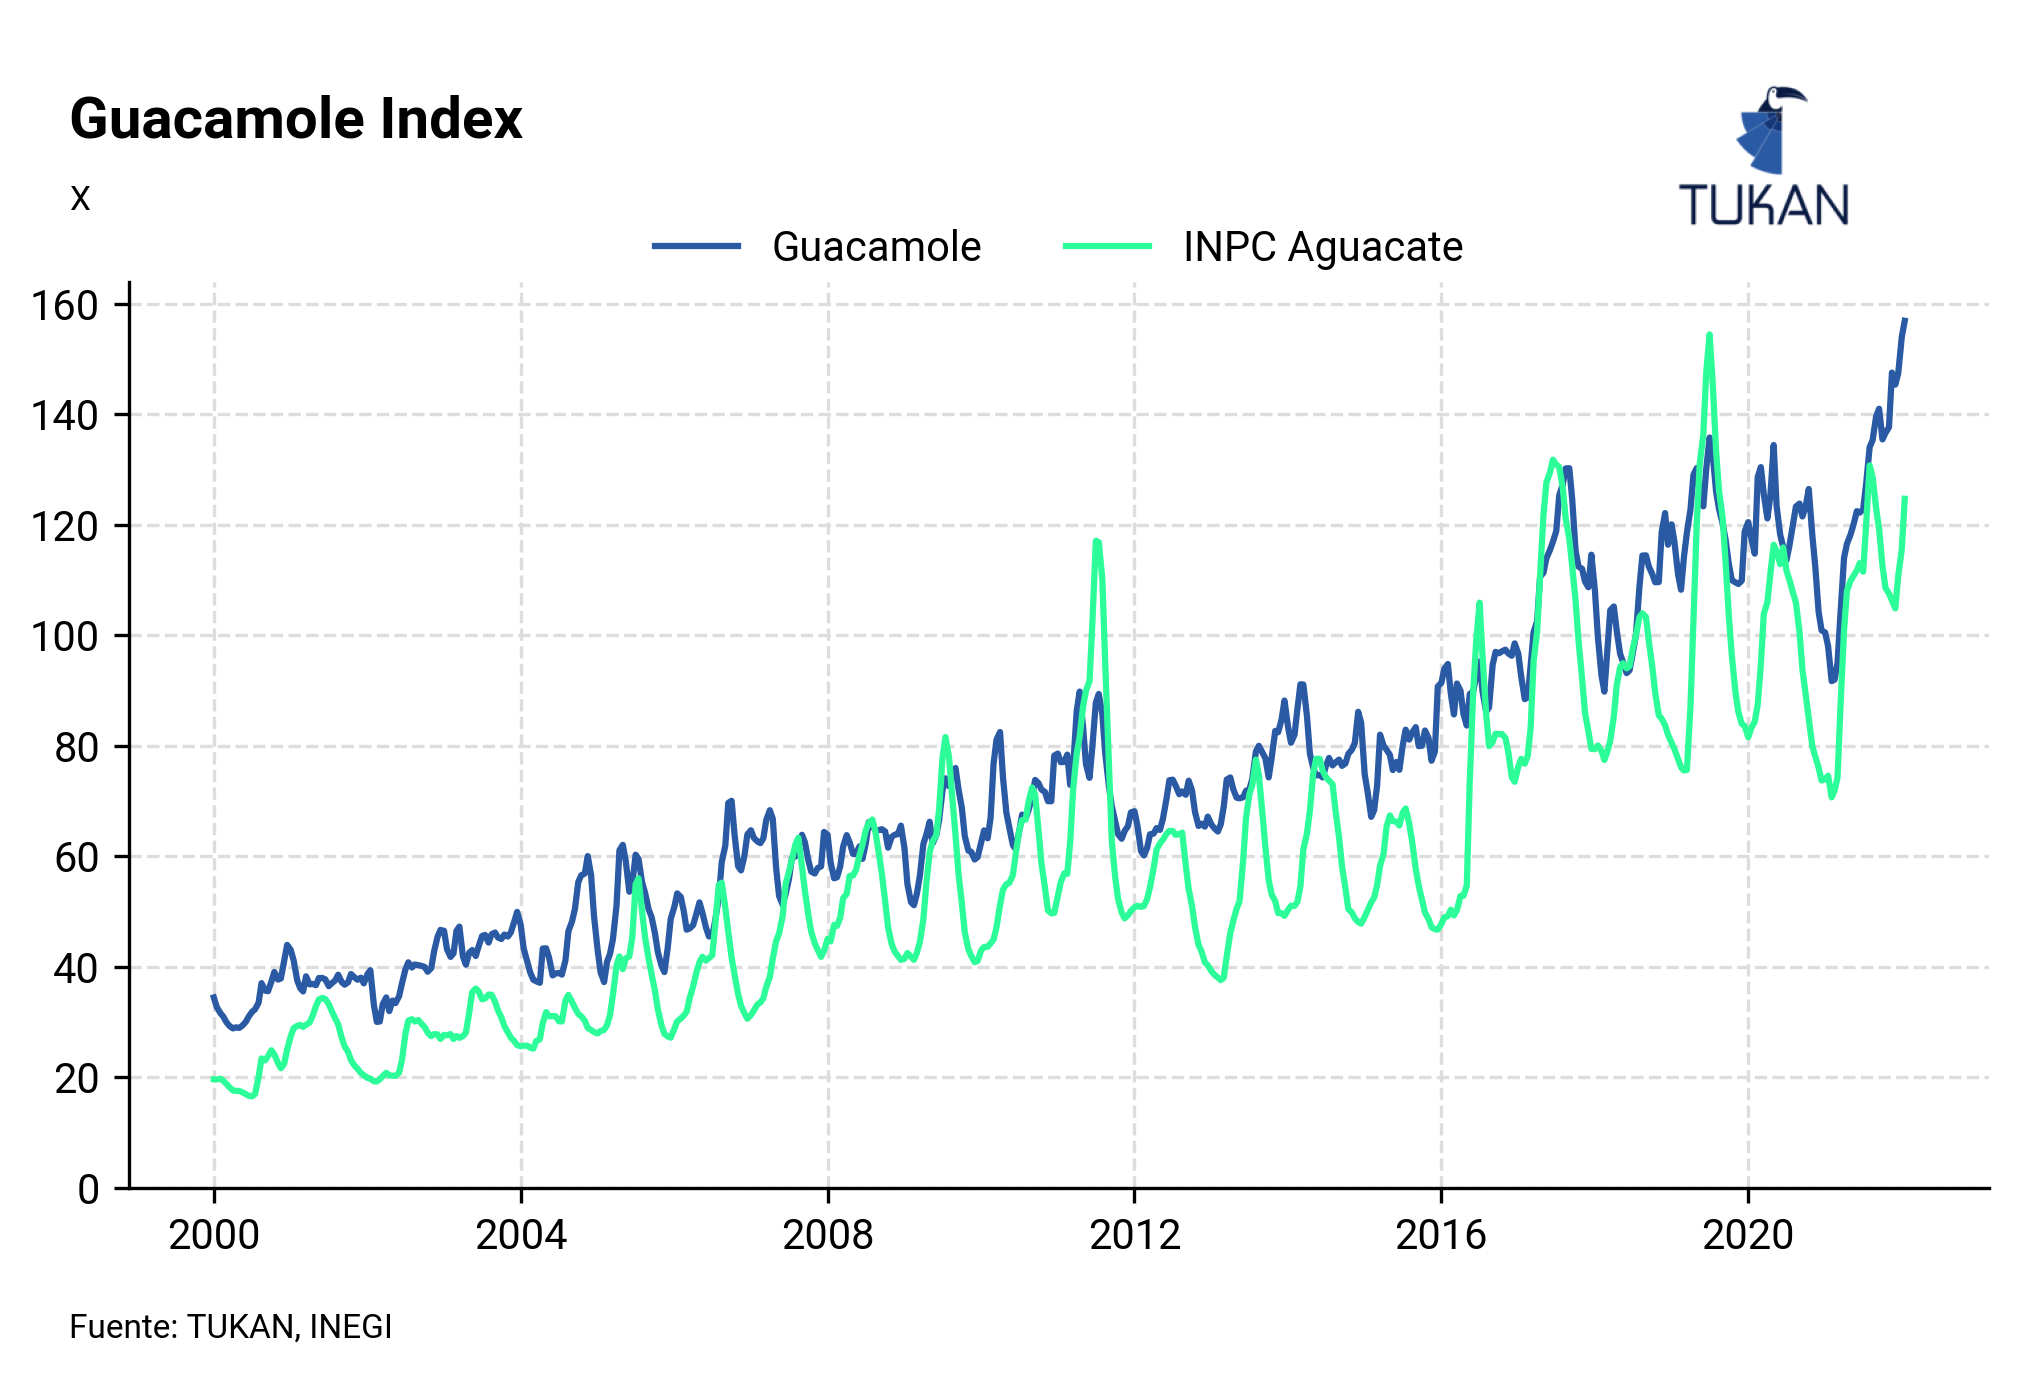

In [571]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

# Data to plot
line1, = ax.plot(final_data['date'],final_data['guacamole_index'], label='Guacamole')
line2, = ax.plot(avocado_data['date'],avocado_data['c572db59b8cd109'], label='INPC Aguacate')

ax.legend(handles=[line1, line2], ncol=2, loc='upper center', bbox_to_anchor=(.5, 1.1))

# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))
# plt.xticks(rotation='vertical')

# Set the locator
# locator = mdates.MonthLocator()  # every month
# # Specify the format - %b gives us Jan, Feb...
# fmt = mdates.DateFormatter('%b')
# ax.xaxis.set_major_locator(locator)
# # Specify formatter
# ax.xaxis.set_major_formatter(fmt)

ax.set_ylim(0)



# Add title and subtitle
fig.text(
    0.1,
    1,
    "Guacamole Index",
    size=14,
    weight = "bold"
)

fig.text(
    0.1,
    0.94,
    "X",
    size=8
)

# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/guacamole_index_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.68, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/guacamole_index_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/guacamole_index_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### Lemonless Guacamole Index

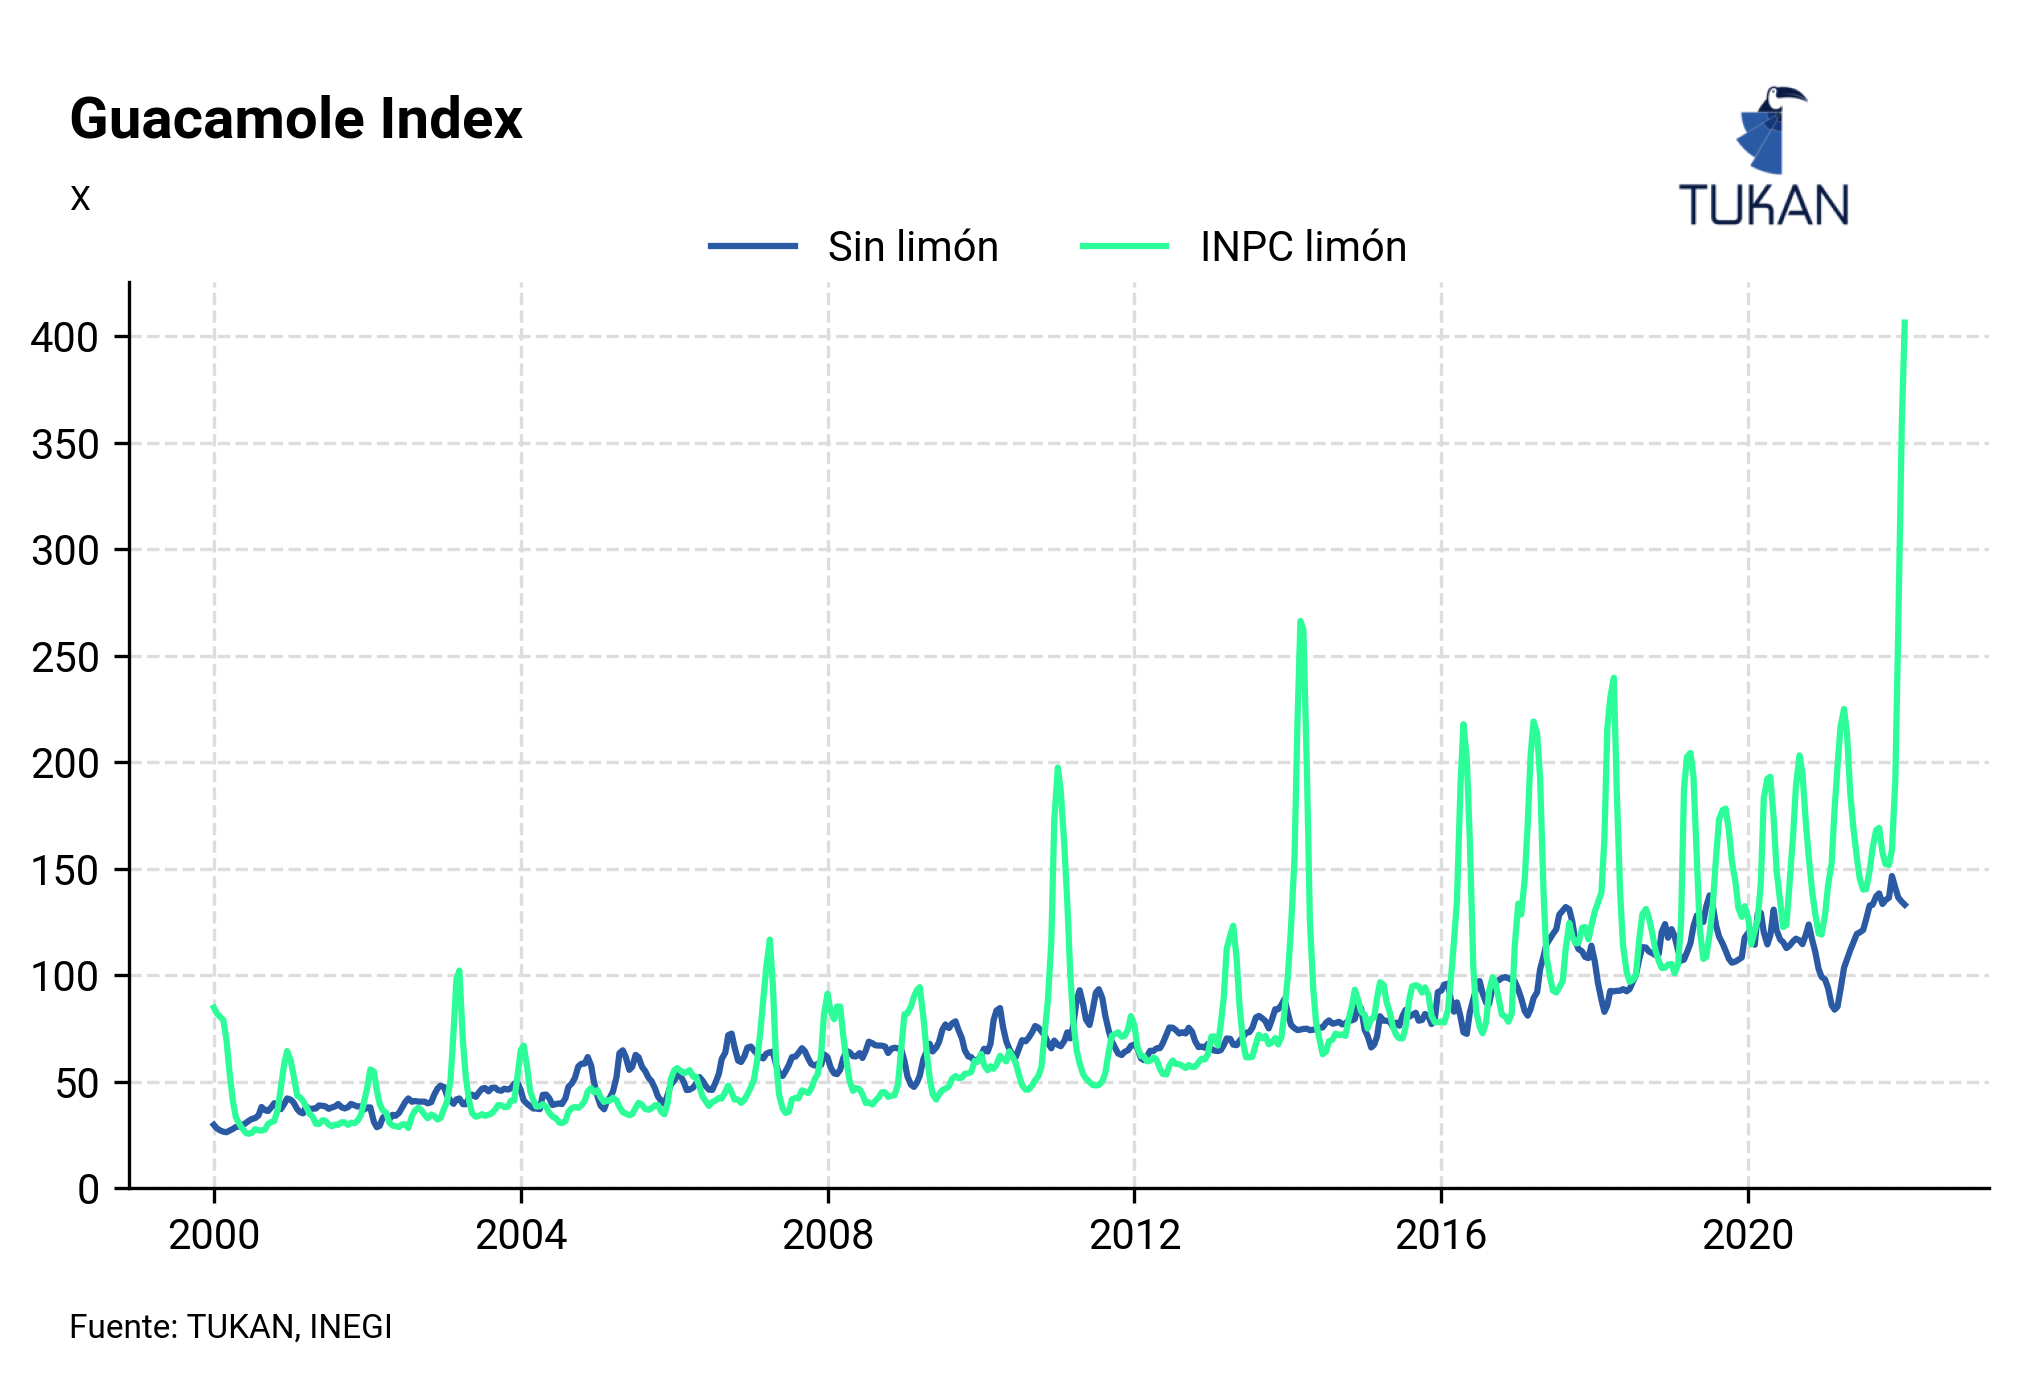

In [572]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

# Data to plot
line1, = ax.plot(final_data['date'],final_data['guacamole_lemonless_index'], label='Sin limón')
# ax.plot(avocado_data['date'],avocado_data['c572db59b8cd109'])
line2, = ax.plot(lemon_data['date'],lemon_data['c572db59b8cd109'], label='INPC limón')

ax.legend(handles=[line1, line2], ncol=2, loc='upper center', bbox_to_anchor=(.5, 1.1))


# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))
# plt.xticks(rotation='vertical')

# Set the locator
# locator = mdates.MonthLocator()  # every month
# # Specify the format - %b gives us Jan, Feb...
# fmt = mdates.DateFormatter('%b')
# ax.xaxis.set_major_locator(locator)
# # Specify formatter
# ax.xaxis.set_major_formatter(fmt)

ax.set_ylim(0)


# Add title and subtitle
fig.text(
    0.1,
    1,
    "Guacamole Index",
    size=14,
    weight = "bold"
)

fig.text(
    0.1,
    0.94,
    "X",
    size=8
)

# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/lemonless_guacamole_index_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.68, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/lemonless_guacamole_index_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/lemonless_guacamole_index_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### Compairson between Guacamole Indexes and CPI

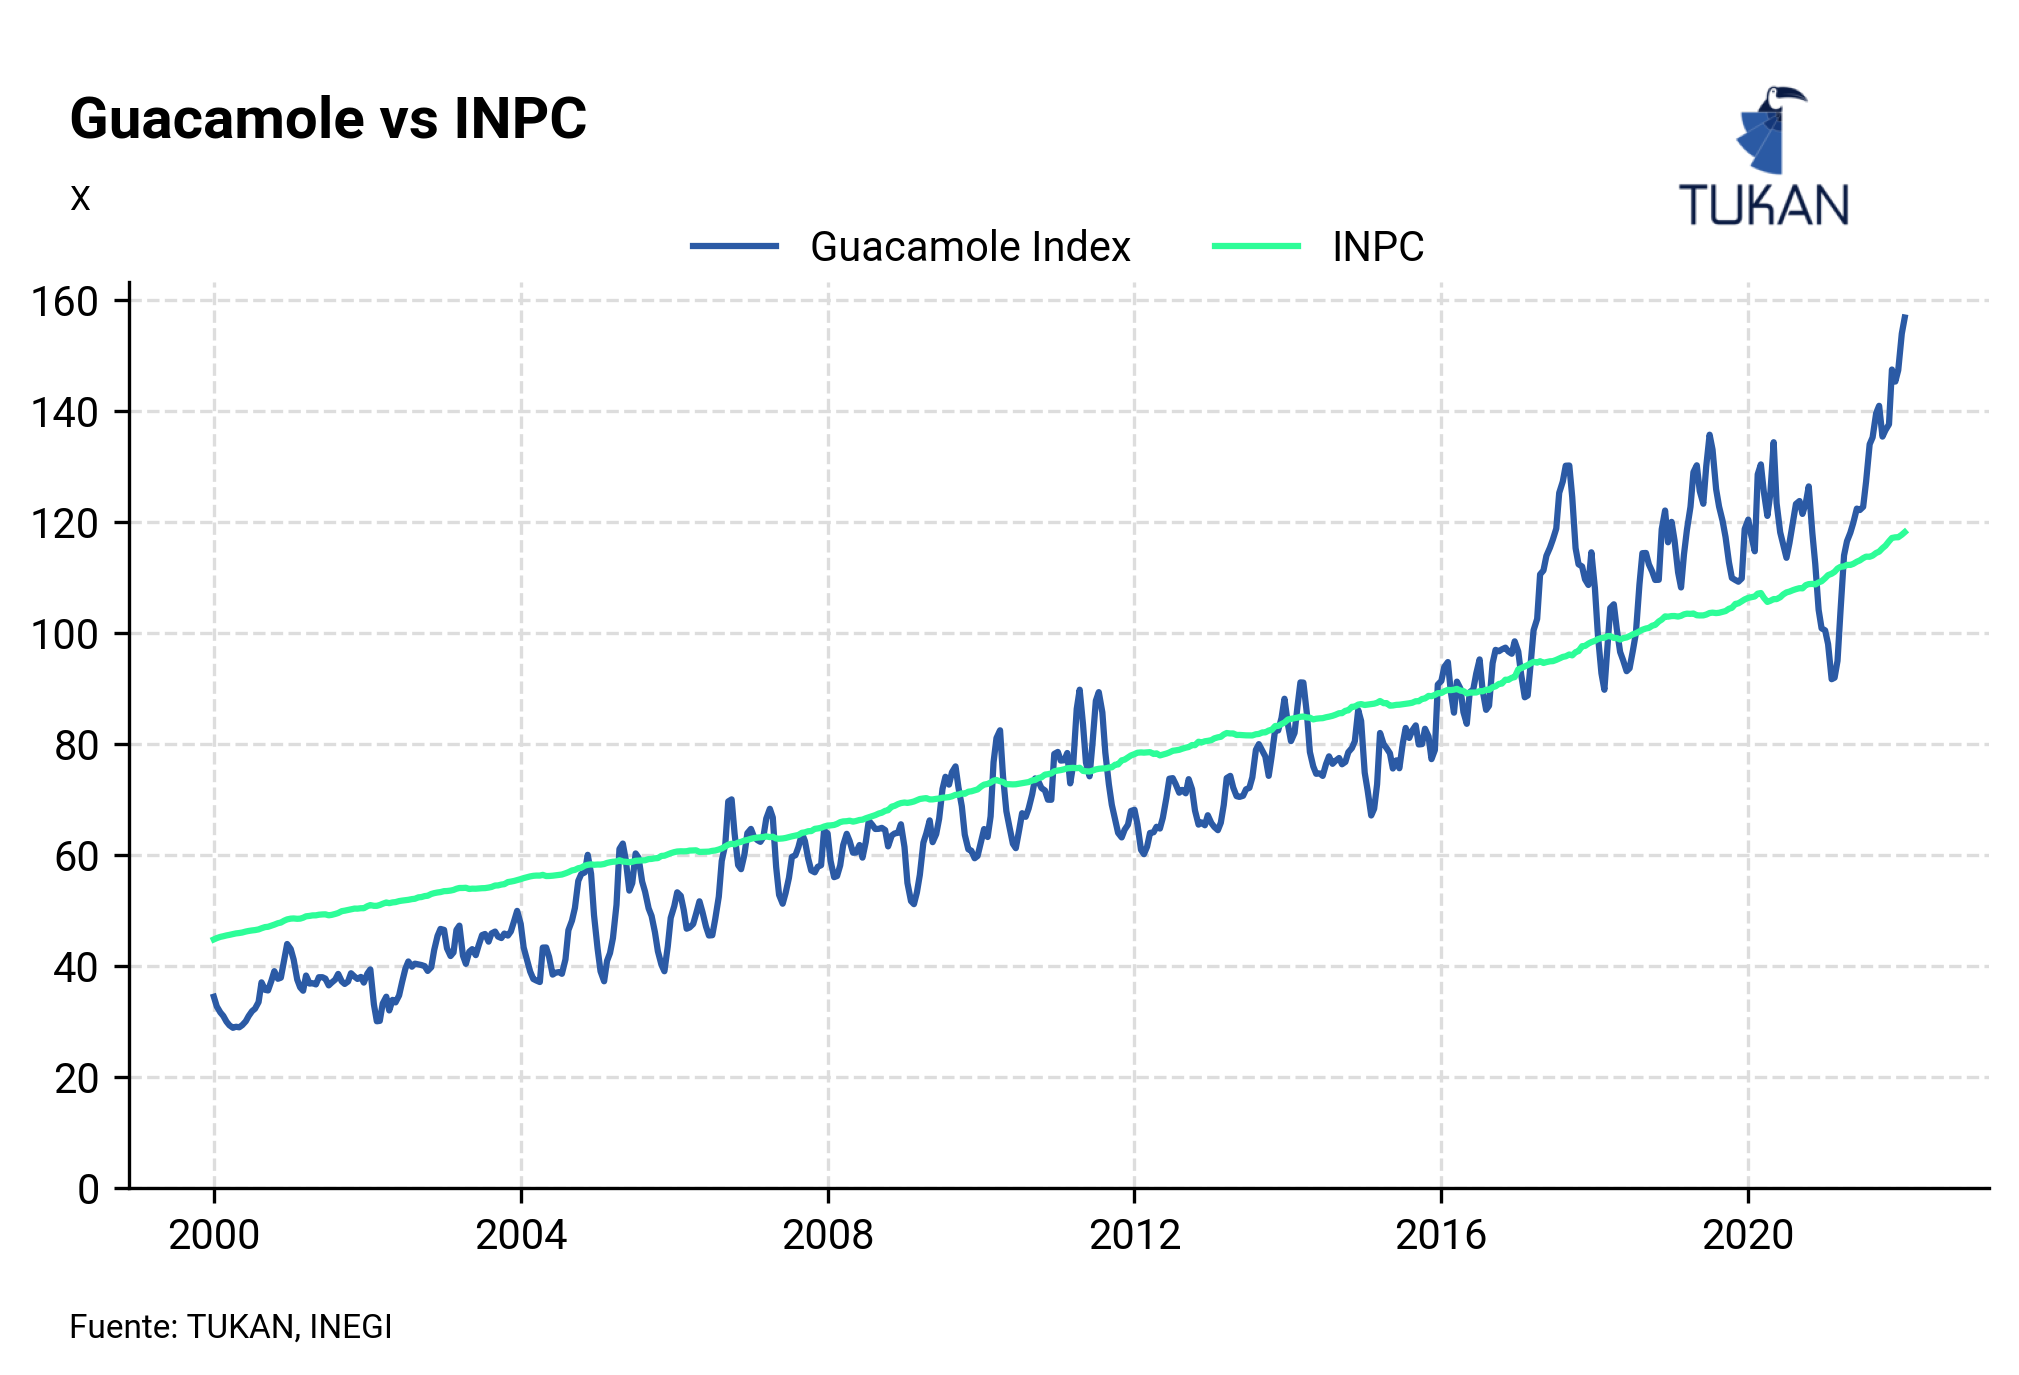

In [573]:
fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

X_min = final_data['date'].min()
X_max = final_data['date'].max()

# Data to plot
line1, = ax.plot(final_data['date'],final_data['guacamole_index'], label='Guacamole Index')
# ax.plot(final_data['date'],final_data['guacamole_lemonless_index'], ls="--")
line2, = ax.plot(final_data['date'],final_data['cpi'], label='INPC')
# ax.hlines(0, X_min, X_max, ls="--", color="black", lw=0.75)

ax.legend(handles=[line1, line2], ncol=2, loc='upper center', bbox_to_anchor=(.5, 1.1))


# Add gridlines and format to ticks
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))

ax.set_ylim(0)

# plt.xticks(rotation='vertical')

# Set the locator
# locator = mdates.MonthLocator()  # every month
# # Specify the format - %b gives us Jan, Feb...
# fmt = mdates.DateFormatter('%b')
# ax.xaxis.set_major_locator(locator)
# # Specify formatter
# ax.xaxis.set_major_formatter(fmt)

# Add title and subtitle
fig.text(
    0.1,
    1,
    "Guacamole vs INPC",
    size=14,
    weight = "bold"
)

fig.text(
    0.1,
    0.94,
    "X",
    size=8
)

# Add footer
fig.text(0.1, -0, "Fuente: TUKAN, INEGI", fontsize=8)

# Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/_guacamole_index_compairson_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.68, .88, 0.18, 0.21], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/_guacamole_index_compairson_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/_guacamole_index_compairson_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)


### Index compairson between 2 biweek of january and average of the last 23 biweeks

In [574]:
rolling_data = final_data.drop(columns=['guac_yoy','lemonless_yoy'])

# Rolling Averages
rolling_data['cpi_rolling'] = rolling_data['cpi'].shift().rolling(22).mean()
rolling_data['guacamole_rolling'] = rolling_data['guacamole_index'].shift().rolling(22).mean()
rolling_data['guacamole_lemonless_rolling'] = rolling_data['guacamole_lemonless_index'].shift().rolling(22).mean()
selected_dates = rolling_data[(rolling_data['date']=='2022-01-15') | (rolling_data['date']=='2021-01-15') | (rolling_data['date']=='2020-01-15')]
# selected_dates = rolling_data[(rolling_data['date']=='2022-01-15')]

selected_dates.reset_index(inplace=True,drop=True)

# Mark ups 
selected_dates['cpi_markup'] = (selected_dates['cpi']/selected_dates['cpi_rolling']) -1
selected_dates['guacamole_markup'] = (selected_dates['guacamole_index']/selected_dates['guacamole_rolling']) -1
selected_dates['guacamole_lemonless_markup'] = (selected_dates['guacamole_lemonless_index']/selected_dates['guacamole_lemonless_rolling'])-1
selected_dates.drop(columns=['guacamole_index','guacamole_lemonless_index','guacamole_rolling','guacamole_lemonless_rolling','cpi', 'cpi_rolling'], inplace=True)
selected_dates

d:\TUKAN\tukan_notebooks\notebook_venv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
d:\TUKAN\tukan_notebooks\notebook_venv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\TUKAN\tukan_notebooks\notebook_venv\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,date,cpi_markup,guacamole_markup,guacamole_lemonless_markup
0,2020-01-15,0.022853,-0.022675,0.004469
1,2021-01-15,0.026142,-0.179098,-0.191873
2,2022-01-15,0.035646,0.229176,0.087723


In [575]:
selected_dates['date'] = selected_dates['date'].dt.year
selected_dates = selected_dates.set_index('date').T
selected_dates

d:\TUKAN\tukan_notebooks\notebook_venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date,2020,2021,2022
cpi_markup,0.022853,0.026142,0.035646
guacamole_markup,-0.022675,-0.179098,0.229176
guacamole_lemonless_markup,0.004469,-0.191873,0.087723


## Data Compairson

In [576]:
compairson_data = pd.merge(cpi_data, guacamole_indexes)
compairson_data = date_selection(final_data,'2019-01-01','2022-01-15',inbewtween=False)
compairson_data

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,2019-01-01,103.105,120.084100,0.110603,121.513624,0.146109
1,2022-01-15,118.234,156.924263,0.600351,133.009644,0.417642


In [577]:
compairson_data = pd.merge(cpi_data, guacamole_indexes)
compairson_data = date_selection(final_data,'2020-01-01','2022-01-15',inbewtween=False)
compairson_data

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,2020-01-01,106.388,120.492638,0.003402,119.891204,-0.013352
1,2022-01-15,118.234,156.924263,0.600351,133.009644,0.417642


In [578]:
compairson_data = pd.merge(cpi_data, guacamole_indexes)
compairson_data = date_selection(final_data,'2021-01-01','2022-01-15',inbewtween=False)
compairson_data

,date,cpi,guacamole_index,guac_yoy,guacamole_lemonless_index,lemonless_yoy
0,2021-01-01,109.936,100.524975,-0.165717,97.839571,-0.183930
1,2022-01-15,118.234,156.924263,0.600351,133.009644,0.417642
